# АППРОКСИМАЦИЯ ФУНКЦИЙ

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy import integrate

### Объявление функции

In [13]:
def f(x):
    return x - (math.sin(x))

### Строим матрицу $Q$

In [23]:
l = -1
r = 1
m = 3
n = 5
x = np.linspace(l, r, n)
y = np.array([f(i) for i in x])
Q = np.zeros((n, m + 1))
for i in range(n):
    for j in range(m + 1):
        Q[i][j] = x[i] ** j

### Решаем систему $Ha=b$, где $H=Q^TQ, b=Q^Ty$

In [15]:
H = np.dot(Q.T, Q)
b = np.dot(Q.T, y)

a = np.linalg.solve(H, b)

### Метод наименьших квадратов

In [16]:
def p1(x):
    res = 0
    for i in range(m + 1):
        res += a[i] * (x ** i)
    return res

### Многочлен Лежандра

In [17]:
def L(n, x) :
    return 1/(math.factorial(n)*(2**n)) * derivative(lambda x : (1 - x**2)**n, x, dx=1e-3, n=n, order=11)

### Коэффиценты $c_i$

In [18]:
def c(k):
    return integrate.quad(lambda x: f(x)*L(k, x), l, r)[0] / integrate.quad(lambda x: L(k, x)**2, l, r)[0]

### Полином приближения в $L_2$

In [19]:
mm = 3
def p2(x):
    res = 0
    for i in range(mm + 1):
        res += c(i)*L(i, x)
    return res

### График исходной функции

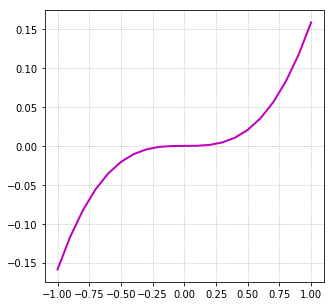

In [20]:
xg = np.arange(l, r + 0.1, 0.1)
yg = np.array([f(i) for i in xg])
plt.figure(figsize=(5, 5))
plt.grid(ls=':')
plt.xticks(np.arange(-1.25, 1.25, 0.25), fontsize=10)
plt.yticks(np.arange(-0.2, 0.2, 0.05), fontsize=10)
plt.plot(xg, yg, linewidth=2, color='m')
plt.show()

### График полинома наилучшего приближения построенного по методу наименьших квадратов

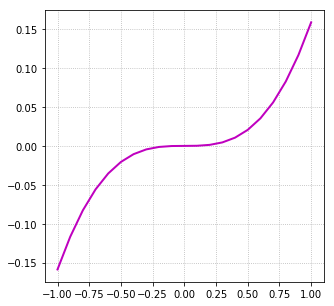

In [21]:
xg = np.arange(l, r + 0.1, 0.1)
yg = np.array([p1(i) for i in xg])
plt.figure(figsize=(5, 5))
plt.grid(ls=':')
plt.xticks(np.arange(-1.25, 1.25, 0.25), fontsize=10)
plt.yticks(np.arange(-0.2, 0.2, 0.05), fontsize=10)
plt.plot(xg, yg, linewidth=2, color='m')
plt.show()

### График полинома наилучшего приближения в пространстве $L_2$

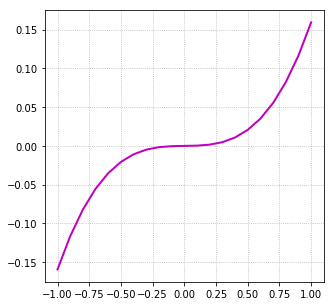

In [22]:
xg = np.arange(l, r + 0.1, 0.1)
yg = np.array([p2(i) for i in xg])
plt.figure(figsize=(5, 5))
plt.grid(ls=':')
plt.xticks(np.arange(-1.25, 1.25, 0.25), fontsize=10)
plt.yticks(np.arange(-0.2, 0.2, 0.05), fontsize=10)
plt.plot(xg, yg, linewidth=2, color='m')
plt.show()